In [1]:
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from osprey.config import Config

/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Get Trial Databases

In [3]:
data_dir = '/Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/Trial Data/DHFR'

In [4]:
config = Config(data_dir+'/Random-var-GMRQ-2/alpha_angle.yaml')
df1 = config.trial_results()
df1['strategy'] = 'fixed'
config = Config(data_dir+'/Random-var-GMRQ-CSE/alpha_angle.yaml')
df2 = config.trial_results()
df2['strategy'] = 'csp'


# df1 = pd.read_pickle('/Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/Trial Data/DHFR/Random-GMRQ-CSE/cse_trials_0-159.pickl')
# df2 = pd.read_pickle('/Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/Trial Data/DHFR/Random-GMRQ-CSE/cse_trials_160-end.pickl')
df = pd.concat([df1, df2])
df.to_pickle('Random-var-all.pickl')

Loading config file:     /Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/Trial Data/DHFR/Random-var-GMRQ-2/alpha_angle.yaml...
Loading trials database: sqlite:///osprey-trials.db...
Loading config file:     /Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/Trial Data/DHFR/Random-var-GMRQ-CSE/alpha_angle.yaml...
Loading trials database: sqlite:///osprey-trials.db...


In [5]:
print(df.shape)
df.head()
df.rename(columns={'project_name': 'feature'}, inplace=True)
df.columns


(6819, 18)


Index(['completed', 'config_sha1', 'elapsed', 'host', 'id', 'mean_test_score',
       'mean_train_score', 'n_test_samples', 'n_train_samples', 'parameters',
       'feature', 'started', 'status', 'test_scores', 'traceback',
       'train_scores', 'user', 'strategy'],
      dtype='object')

In [6]:
df = df.loc[:,['id', 'feature', 'parameters', 'test_scores', 'train_scores', 'strategy']]
df.shape

(6819, 6)

In [7]:
df.reset_index(inplace=True, drop=True)


In [8]:
df.head(2)

,id,feature,parameters,test_scores,train_scores,strategy
0,1,alpha_angle,"{'msm__ergodic_cutoff': 'on', 'msm__lag_time':...","[2.977152429810875, 2.9909674944247566, 2.9662...","[2.988860204149737, 2.9987766501032995, 2.9960...",fixed
1,2,alpha_angle,"{'msm__ergodic_cutoff': 'on', 'msm__lag_time':...","[2.953804573511941, 2.946792661204334, 2.97513...","[2.9998938576712026, 2.9995053860291425, 2.999...",fixed


In [9]:
for i in [3,4,5,10,20]:
    df2 = pd.read_pickle('best_trials-{}.pickl'.format(i))
    df = df.merge(df2.loc[:, ['id', 'feature', 'strategy', 'test_scores-{}'.format(i)]], on=['id', 'feature', 'strategy'], 
                  how='left')

In [10]:
df.dropna(how='any', inplace=True)

In [11]:
df.head()

,id,feature,parameters,test_scores,train_scores,strategy,test_scores-3,test_scores-4,test_scores-5,test_scores-10,test_scores-20
84,89,phi-o_tor,"{'msm__ergodic_cutoff': 'on', 'msm__lag_time':...","[2.97458285383985, 2.9980703042826296, 2.98347...","[2.999878354178305, 2.99876615867694, 2.999621...",fixed,"[3.98235554518, 3.9339649923, 3.82391301814, 3...","[4.61335551673, 4.87207116484, 4.78963732251, ...","[5.57359077792, 5.86374196413, 5.68285100717, ...","[8.77215358589, 10.3986946468, 9.4027366013, 1...","[12.4409138155, 17.5916295223, 14.7383145326, ..."
99,104,psi_tor,"{'msm__ergodic_cutoff': 'on', 'msm__lag_time':...","[2.985860350448288, 2.9843139728558556, 2.9951...","[2.992937914573907, 2.996665354941647, 2.99703...",fixed,"[3.92488290655, 3.97309125025, 3.96189506557, ...","[4.85911783698, 4.91369141322, 4.97387937628, ...","[5.93505878796, 5.53321593932, 5.9506899591, 5...","[10.7351982486, 9.36653188885, 9.74512113304, ...","[17.6552635703, 14.1773410937, 16.73099659, 16..."
122,127,psi-o_tor,"{'msm__ergodic_cutoff': 'on', 'msm__lag_time':...","[2.992321843999408, 2.975991699022874, 2.98916...","[2.997591526459419, 2.9996469000036248, 2.9949...",fixed,"[3.97955712058, 3.97720170818, 3.98140146193, ...","[4.94697268433, 4.92467428657, 4.74590197355, ...","[5.96371548459, 5.87296010681, 5.9617445641, 5...","[10.4227525168, 9.69644675595, 10.208877946, 1...","[17.3119926002, 14.8948391408, 17.9634790226, ..."
126,131,psi-o_tor,"{'msm__ergodic_cutoff': 'on', 'msm__lag_time':...","[2.9920452753522047, 2.9739347652602905, 2.992...","[2.994193480603938, 2.9979687091141156, 2.9975...",fixed,"[3.97008039578, 3.98240928573, 3.98169681142, ...","[4.9552776306, 4.94105207297, 4.95595992091, 4...","[5.86049773647, 5.92640434339, 5.79986960447, ...","[10.0783930858, 10.1990555216, 9.57260523243, ...","[17.8347067965, 16.5594834191, 16.5707584984, ..."
361,437,psi-o_tor,"{'msm__ergodic_cutoff': 'on', 'msm__lag_time':...","[2.975478951401625, 2.9894167243986347, 2.9927...","[2.9933239479547558, 2.9948690502943873, 2.998...",fixed,"[3.98905459635, 3.98084471766, 3.98467980924, ...","[4.98041301245, 4.93884248565, 4.97015898599, ...","[5.94100421596, 5.90350170048, 5.89604328828, ...","[9.95967904006, 10.1747743576, 9.62502088741, ...","[16.0997749072, 15.2209836873, 16.6923412728, ..."


## Locate errors

In [12]:
def has_error(x):
    return np.any(np.isnan(x))

In [13]:
df['error'] = (df['test_scores'].apply(has_error) | df['train_scores'].apply(has_error))


In [14]:
print(df.shape)
df = df.loc[~df['error'], :]
del df['error']
print(df.shape)

(198, 12)
(198, 11)


## Extract optimized parameters

In [15]:
params = ['cluster__n_clusters', 'tica__n_components', 'tica__lag_time', 'variance_cut__threshold']
for param in params:
    df[param] = df.loc[:, 'parameters'].apply(lambda x: x[param])

In [16]:
df.drop(labels='parameters', axis=1, inplace=True)
df.sort_values(inplace=True, by='id', axis=0)

In [17]:
df.head()

,id,feature,test_scores,train_scores,strategy,test_scores-3,test_scores-4,test_scores-5,test_scores-10,test_scores-20,cluster__n_clusters,tica__n_components,tica__lag_time,variance_cut__threshold
3383,15,kappa_angle,"[1.9766243208932617, 3.949663457098282, 2.9984...","[1.9999712890982275, 3.998963486291581, 2.9998...",csp,"[3.9587942014, 3.90681297576, 3.79956756042, 3...","[4.83544091094, 4.82132420227, 4.72934922384, ...","[5.0392988573, 5.77291950583, 5.85373165135, 5...","[9.66639121425, 9.78657987298, 9.33054424162, ...","[15.0230450947, 11.2944033752, 16.8542309887, ...",221,4,246,0.000169
3417,53,omega_tor,"[7.514087135143204, 1.9064329304714343, 11.700...","[7.961957461794894, 1.952365057473859, 14.5879...",csp,"[3.61093766257, 3.67565462458, 3.63638270815, ...","[4.51848784525, 4.42127159313, 4.55559247718, ...","[5.16773126314, 5.36035476354, 5.35714345243, ...","[8.04461154393, 8.48200646011, 7.96849341769, ...","[11.3365089396, 12.196625958, 11.1464054248, 1...",978,9,195,0.004492
84,89,phi-o_tor,"[2.97458285383985, 2.9980703042826296, 2.98347...","[2.999878354178305, 2.99876615867694, 2.999621...",fixed,"[3.98235554518, 3.9339649923, 3.82391301814, 3...","[4.61335551673, 4.87207116484, 4.78963732251, ...","[5.57359077792, 5.86374196413, 5.68285100717, ...","[8.77215358589, 10.3986946468, 9.4027366013, 1...","[12.4409138155, 17.5916295223, 14.7383145326, ...",414,10,360,0.005813
99,104,psi_tor,"[2.985860350448288, 2.9843139728558556, 2.9951...","[2.992937914573907, 2.996665354941647, 2.99703...",fixed,"[3.92488290655, 3.97309125025, 3.96189506557, ...","[4.85911783698, 4.91369141322, 4.97387937628, ...","[5.93505878796, 5.53321593932, 5.9506899591, 5...","[10.7351982486, 9.36653188885, 9.74512113304, ...","[17.6552635703, 14.1773410937, 16.73099659, 16...",652,2,216,0.000290
122,127,psi-o_tor,"[2.992321843999408, 2.975991699022874, 2.98916...","[2.997591526459419, 2.9996469000036248, 2.9949...",fixed,"[3.97955712058, 3.97720170818, 3.98140146193, ...","[4.94697268433, 4.92467428657, 4.74590197355, ...","[5.96371548459, 5.87296010681, 5.9617445641, 5...","[10.4227525168, 9.69644675595, 10.208877946, 1...","[17.3119926002, 14.8948391408, 17.9634790226, ...",184,2,101,0.008936


## Remove duplicates
Apparently Osprey *can* produce duplicates

In [18]:
before = df.groupby(['strategy', 'feature'])['id'].aggregate(np.size)
subset = ['feature', 'strategy'] + params
df.drop_duplicates(subset=subset, inplace=True)
after = df.groupby(['strategy', 'feature'])['id'].aggregate(np.size)

In [19]:
before = pd.DataFrame(before.reset_index())
after = pd.DataFrame(after.reset_index())



In [20]:
loss = before.merge(after, on=['strategy', 'feature'], how='outer')

loss['loss'] = loss['id_x'] - loss['id_y']

In [21]:
loss.sort_values(by='loss', ascending=False)

,strategy,feature,id_x,id_y,loss
0,csp,alpha_angle,3,3,0
1,csp,kappa_angle,17,17,0
2,csp,omega_tor,17,17,0
3,csp,phi-o_tor,1,1,0
4,csp,phi_tor,3,3,0
5,csp,psi-o_tor,26,26,0
6,csp,psi_tor,32,32,0
7,fixed,alpha_angle,15,15,0
8,fixed,kappa_angle,41,41,0
9,fixed,phi-o_tor,1,1,0


## Melt dataframe

In [22]:
df.rename(columns={'test_scores': 'test_scores-2'}, inplace=True)
del df['train_scores']
df = df.melt(id_vars = ['id', 'feature', 'strategy', 'cluster__n_clusters', 'tica__n_components', 'tica__lag_time', 'variance_cut__threshold'], 
            var_name='n_timescales', value_name='GMRQ(n)')


In [23]:
df['n_timescales'] = df['n_timescales'].apply(lambda x: int(x.split('-')[-1]))

In [24]:
df.head()

,id,feature,strategy,cluster__n_clusters,tica__n_components,tica__lag_time,variance_cut__threshold,n_timescales,GMRQ(n)
0,15,kappa_angle,csp,221,4,246,0.000169,2,"[1.9766243208932617, 3.949663457098282, 2.9984..."
1,53,omega_tor,csp,978,9,195,0.004492,2,"[7.514087135143204, 1.9064329304714343, 11.700..."
2,89,phi-o_tor,fixed,414,10,360,0.005813,2,"[2.97458285383985, 2.9980703042826296, 2.98347..."
3,104,psi_tor,fixed,652,2,216,0.000290,2,"[2.985860350448288, 2.9843139728558556, 2.9951..."
4,127,psi-o_tor,fixed,184,2,101,0.008936,2,"[2.992321843999408, 2.975991699022874, 2.98916..."


## Calculate mean and error score 


In [25]:
from sklearn.utils import resample
def safe_mean(x):
    try:
        return np.array(x).mean()
    except TypeError:
        return np.nan

def safe_median(x):
    try:
        return np.median(x)
    except TypeError:
        return np.nan
    
def safe_error(x):
    try:
        return np.array(x).std()*1.96
    except TypeError:
        return np.nan


In [26]:
# Note - this assumes that the folds are all the same size.  This is fine for DHFR as all trajectories are 1000 ns long. 

observables = ['GMRQ(n)']

for observable in observables:
        df[observable+'_error'] = df.loc[:, observable].apply(safe_error)
        df[observable+'_mean'] = df.loc[:, observable].apply(safe_mean)
        df[observable+'_med'] = df.loc[:, observable].apply(safe_median)

## Keep only fixed strategy

In [27]:
df = df.loc[df['strategy']=='fixed', :]
df.head()

,id,feature,strategy,cluster__n_clusters,tica__n_components,tica__lag_time,variance_cut__threshold,n_timescales,GMRQ(n),GMRQ(n)_error,GMRQ(n)_mean,GMRQ(n)_med
2,89,phi-o_tor,fixed,414,10,360,0.005813,2,"[2.97458285383985, 2.9980703042826296, 2.98347...",0.017902,2.988939,2.989783
3,104,psi_tor,fixed,652,2,216,0.000290,2,"[2.985860350448288, 2.9843139728558556, 2.9951...",0.009548,2.990947,2.993528
4,127,psi-o_tor,fixed,184,2,101,0.008936,2,"[2.992321843999408, 2.975991699022874, 2.98916...",0.011164,2.986746,2.989168
5,131,psi-o_tor,fixed,961,2,21,0.000347,2,"[2.9920452753522047, 2.9739347652602905, 2.992...",0.014660,2.988560,2.992045
18,437,psi-o_tor,fixed,79,2,46,0.017177,2,"[2.975478951401625, 2.9894167243986347, 2.9927...",0.012645,2.987875,2.989417


## Generate ranks

In [28]:
df_rank = df.loc[:, ['n_timescales','GMRQ(n)_mean']].groupby('n_timescales').rank(method='average', ascending=False)
df_rank.columns = ['rank']

In [29]:
df = df.merge(df_rank, left_index=True, right_index=True)

In [30]:
del df['strategy']
df.head()

,id,feature,cluster__n_clusters,tica__n_components,tica__lag_time,variance_cut__threshold,n_timescales,GMRQ(n),GMRQ(n)_error,GMRQ(n)_mean,GMRQ(n)_med,rank
2,89,phi-o_tor,414,10,360,0.005813,2,"[2.97458285383985, 2.9980703042826296, 2.98347...",0.017902,2.988939,2.989783,49.0
3,104,psi_tor,652,2,216,0.000290,2,"[2.985860350448288, 2.9843139728558556, 2.9951...",0.009548,2.990947,2.993528,24.0
4,127,psi-o_tor,184,2,101,0.008936,2,"[2.992321843999408, 2.975991699022874, 2.98916...",0.011164,2.986746,2.989168,98.0
5,131,psi-o_tor,961,2,21,0.000347,2,"[2.9920452753522047, 2.9739347652602905, 2.992...",0.014660,2.988560,2.992045,53.0
18,437,psi-o_tor,79,2,46,0.017177,2,"[2.975478951401625, 2.9894167243986347, 2.9927...",0.012645,2.987875,2.989417,66.0


## Label top performing

In [31]:
df['Top Scoring']= False


In [32]:
def is_top(grp):
    err = grp.loc[grp['rank']==1.0, 'GMRQ(n)_error'].values[0]
    mean = grp.loc[grp['rank']==1.0, 'GMRQ(n)_mean'].values[0]
    low_bound = mean - err
    grp['Top Scoring'] = grp['GMRQ(n)_mean'] > low_bound
    return grp


In [33]:
df = df.groupby('n_timescales').apply(is_top)

In [34]:
df.head()

,id,feature,cluster__n_clusters,tica__n_components,tica__lag_time,variance_cut__threshold,n_timescales,GMRQ(n),GMRQ(n)_error,GMRQ(n)_mean,GMRQ(n)_med,rank,Top Scoring
2,89,phi-o_tor,414,10,360,0.005813,2,"[2.97458285383985, 2.9980703042826296, 2.98347...",0.017902,2.988939,2.989783,49.0,True
3,104,psi_tor,652,2,216,0.000290,2,"[2.985860350448288, 2.9843139728558556, 2.9951...",0.009548,2.990947,2.993528,24.0,True
4,127,psi-o_tor,184,2,101,0.008936,2,"[2.992321843999408, 2.975991699022874, 2.98916...",0.011164,2.986746,2.989168,98.0,True
5,131,psi-o_tor,961,2,21,0.000347,2,"[2.9920452753522047, 2.9739347652602905, 2.992...",0.014660,2.988560,2.992045,53.0,True
18,437,psi-o_tor,79,2,46,0.017177,2,"[2.975478951401625, 2.9894167243986347, 2.9927...",0.012645,2.987875,2.989417,66.0,True


## Expand 

In [35]:
to_expand = ['GMRQ(n)'] 

In [36]:
df_expanded = []
for col in to_expand:    
    s = df.apply(lambda x: pd.Series(x[col]),axis=1).stack().reset_index(level=1, drop=True)
    s.name=col
    df_expanded.append(pd.DataFrame(s))
    df.drop(labels=col, axis=1, inplace=True)
    
df_expanded = pd.concat(df_expanded, axis=1)

In [37]:
trials = df.merge(right=df_expanded, how='inner', right_index=True, left_index=True, sort=True)
trials.head()


,id,feature,cluster__n_clusters,tica__n_components,tica__lag_time,variance_cut__threshold,n_timescales,GMRQ(n)_error,GMRQ(n)_mean,GMRQ(n)_med,rank,Top Scoring,GMRQ(n)
2,89,phi-o_tor,414,10,360,0.005813,2,0.017902,2.988939,2.989783,49.0,True,2.974583
2,89,phi-o_tor,414,10,360,0.005813,2,0.017902,2.988939,2.989783,49.0,True,2.998070
2,89,phi-o_tor,414,10,360,0.005813,2,0.017902,2.988939,2.989783,49.0,True,2.983472
2,89,phi-o_tor,414,10,360,0.005813,2,0.017902,2.988939,2.989783,49.0,True,2.998789
2,89,phi-o_tor,414,10,360,0.005813,2,0.017902,2.988939,2.989783,49.0,True,2.989783


## Label top performing

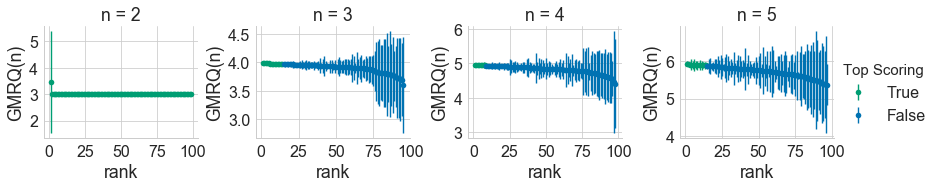

In [38]:
from matplotlib.ticker import LinearLocator, ScalarFormatter, MultipleLocator
ticker = MultipleLocator(10)
sample = df.loc[(df['rank']<100) & (df['n_timescales']<6), :]
cols = sns.color_palette('colorblind')
scoring_order=[True, False]
cols = [cols[1], cols[0]]
scoring_cols = dict(zip(scoring_order, cols))

with sns.plotting_context("paper", font_scale=2):
# .loc[trials['n_timescales']<6, :]
    sns.set_style('whitegrid')

    g = sns.FacetGrid(col='n_timescales', hue='Top Scoring', sharey=False, sharex=False, data=sample, 
                      hue_order=scoring_order, palette=scoring_cols)
    g.map(plt.errorbar, 'rank', 'GMRQ(n)_mean', 'GMRQ(n)_error',fmt='o')
    g.set(ylabel='GMRQ(n)')
    g.set_titles("n = {col_name}")
    g.add_legend()
plt.savefig('figures/top_ranking_score_comparison.png')

## Add timescales

In [39]:
df_ts = pd.read_pickle(data_dir+'/AllTimescales/best_trials-all_ts.pickl')

In [40]:
df_ts = df_ts.loc[df_ts['strategy']=='fixed', :]
df_ts.drop(labels=['rank', 'test_scores_mean'], inplace=True, axis=1)

In [41]:
df_all = df.merge(right=df_ts, on=['id', 'feature', 'cluster__n_clusters', 
                                    'tica__n_components', 'tica__lag_time','variance_cut__threshold' ], how='left')

In [42]:
df.head()

,id,feature,cluster__n_clusters,tica__n_components,tica__lag_time,variance_cut__threshold,n_timescales,GMRQ(n)_error,GMRQ(n)_mean,GMRQ(n)_med,rank,Top Scoring
2,89,phi-o_tor,414,10,360,0.005813,2,0.017902,2.988939,2.989783,49.0,True
3,104,psi_tor,652,2,216,0.000290,2,0.009548,2.990947,2.993528,24.0,True
4,127,psi-o_tor,184,2,101,0.008936,2,0.011164,2.986746,2.989168,98.0,True
5,131,psi-o_tor,961,2,21,0.000347,2,0.014660,2.988560,2.992045,53.0,True
18,437,psi-o_tor,79,2,46,0.017177,2,0.012645,2.987875,2.989417,66.0,True


In [43]:
print(df.shape)
print(df_ts.shape)
print(df.shape)
df_all.head()

(594, 12)
(99, 8)
(594, 12)


,id,feature,cluster__n_clusters,tica__n_components,tica__lag_time,variance_cut__threshold,n_timescales,GMRQ(n)_error,GMRQ(n)_mean,GMRQ(n)_med,rank,Top Scoring,all_timescales,strategy
0,89,phi-o_tor,414,10,360,0.005813,2,0.017902,2.988939,2.989783,49.0,True,"[4166269.44667, 320865.601984, 226620.511575, ...",fixed
1,104,psi_tor,652,2,216,0.000290,2,0.009548,2.990947,2.993528,24.0,True,"[81928.7920257, 36132.6957998, 32759.1763231, ...",fixed
2,127,psi-o_tor,184,2,101,0.008936,2,0.011164,2.986746,2.989168,98.0,True,"[142826.151404, 49847.4696597, 28030.1128525, ...",fixed
3,131,psi-o_tor,961,2,21,0.000347,2,0.014660,2.988560,2.992045,53.0,True,"[45596.2706637, 32983.3151987, 20229.427573, 1...",fixed
4,437,psi-o_tor,79,2,46,0.017177,2,0.012645,2.987875,2.989417,66.0,True,"[38582.417797, 28285.791056, 27178.0190915, 16...",fixed


In [59]:
df.loc[df['n_timescales']==5, :].sort_values(by='rank', ascending=True)

,id,feature,cluster__n_clusters,tica__n_components,tica__lag_time,variance_cut__threshold,n_timescales,GMRQ(n)_error,GMRQ(n)_mean,GMRQ(n)_med,rank,Top Scoring,feature_code
774,2943,$\kappa$,39,3,112,0.019011,5,0.059655,5.936864,5.948203,1.0,True,1
612,437,"($\psi,\omega$)",79,2,46,0.017177,5,0.041573,5.914112,5.903502,2.0,True,5
663,1540,$\alpha$,29,3,364,0.010832,5,0.055550,5.911948,5.922014,3.0,True,0
678,1795,$\kappa$,212,3,73,0.009922,5,0.151241,5.903026,5.925172,4.0,True,1
628,840,$\psi$,94,2,98,0.028057,5,0.108436,5.900732,5.879925,5.0,True,3
745,2641,$\kappa$,881,3,299,0.013365,5,0.148866,5.900213,5.933984,6.0,True,1
652,1341,$\kappa$,114,3,253,0.012465,5,0.106638,5.896706,5.914172,7.0,True,1
664,1542,$\alpha$,58,6,119,0.005182,5,0.123404,5.893751,5.938719,8.0,True,0
651,1336,$\kappa$,11,3,299,0.037612,5,0.057530,5.893050,5.885898,9.0,True,1
740,2605,$\kappa$,548,3,37,0.075748,5,0.132623,5.892941,5.929577,10.0,True,1


In [45]:
def split_ts(x):
    ratios = x[:-1]/x[1:]
    split_idx = np.argmax(ratios)+1
    slow = x[:split_idx]
    fast = x[split_idx:]
    return slow, fast

2 timescales , gap =  8.3151164567
      id feature  cluster__n_clusters  tica__n_components  tica__lag_time  \
98  3927  pp_tor                   56                   3             384   

    variance_cut__threshold  n_timescales  GMRQ(n)_error  GMRQ(n)_mean  \
98                 0.000656             2       1.925401      3.450051   

    GMRQ(n)_med  rank  Top Scoring  \
98      2.98047   1.0         True   

                                       all_timescales strategy  
98  [19715.0136353, 12702.9148612, 1828.93760384, ...    fixed  


 /Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/ipykernel/__main__.py:36: RuntimeWarning:invalid value encountered in greater


3 timescales , gap =  3.68111227267
       id      feature  cluster__n_clusters  tica__n_components  \
176  2641  kappa_angle                  881                   3   

     tica__lag_time  variance_cut__threshold  n_timescales  GMRQ(n)_error  \
176             299                 0.013365             3       0.016981   

     GMRQ(n)_mean  GMRQ(n)_med  rank  Top Scoring  \
176      3.983681     3.987257   1.0         True   

                                        all_timescales strategy  
176  [480749.098909, 130598.868847, 52003.5590904, ...    fixed  
4 timescales , gap =  4.41423447693
       id      feature  cluster__n_clusters  tica__n_components  \
223  1341  kappa_angle                  114                   3   

     tica__lag_time  variance_cut__threshold  n_timescales  GMRQ(n)_error  \
223             253                 0.012465             4       0.013738   

     GMRQ(n)_mean  GMRQ(n)_med  rank  Top Scoring  \
223      4.958976     4.956042   1.0         True   

  

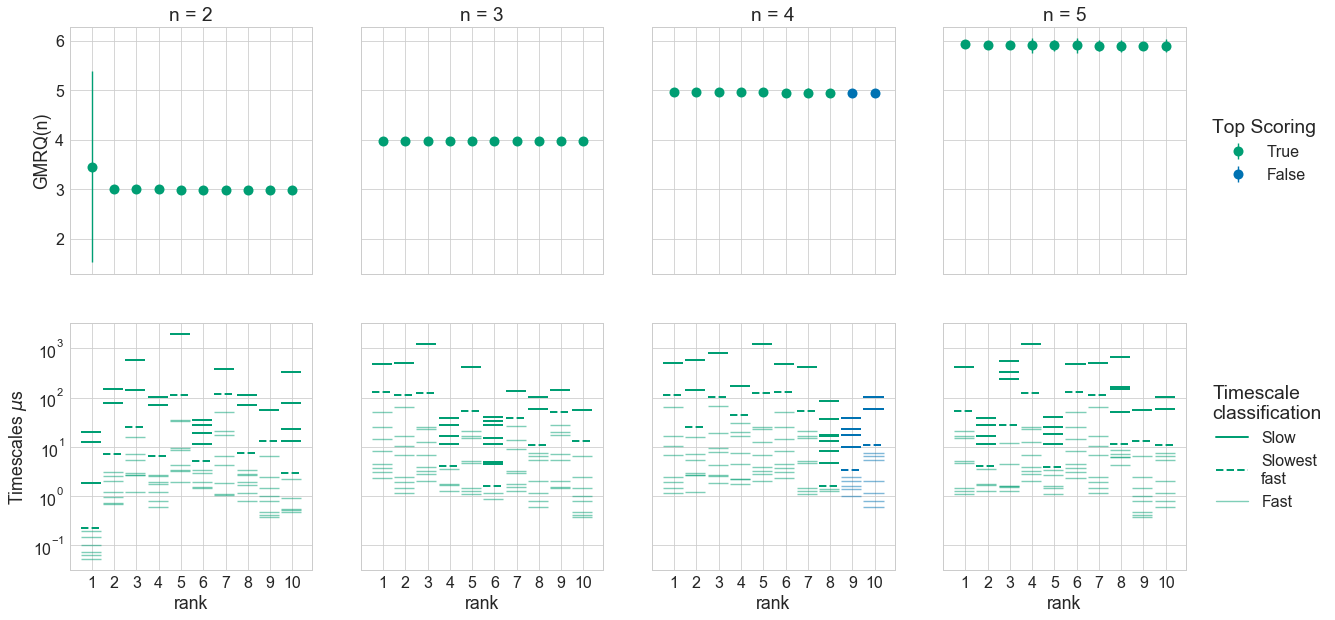

In [46]:
from matplotlib.ticker import *
import matplotlib.lines as mlines
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection

with sns.plotting_context('paper', font_scale=2):
    columns = [2, 3, 4, 5]
    fig, axes = plt.subplots(2, len(columns), sharey='row', sharex=True, figsize=(20,10))


    max_rank = 10
    max_ts = 10
    ts_scale = 1e3
    lag_time = 50
    ts_unit = r'$\mu$s'
    ticker = FixedLocator(locs=np.arange(max_rank)+1)


    for idx, col in enumerate(columns):
        index = (df_all['rank'] <= max_rank) & (df_all['n_timescales']==col)
        
        x = df_all.loc[index, 'rank'].values
        y = df_all.loc[index, 'GMRQ(n)_mean'].values
        yerr = df_all.loc[index, 'GMRQ(n)_error'].values
        istops = df_all.loc[index, 'Top Scoring'].values
        colors = [scoring_cols[i] for i in istops]
        for i in range(len(x)):
            axes[0, idx].errorbar(x[i], y[i],yerr=yerr[i],  fmt='o', color=colors[i], ms=10, label=istops[i])
            
        
        for j in range(max_rank):
            index2 = (df_all['n_timescales']==col) & (df_all['rank'] == float(j+1))
            is_top = df_all.loc[index2, 'Top Scoring'].values[0]
            x0, x1 = 1+j-0.5, 1+j+0.4
            ts = df_all.loc[index2, 'all_timescales'].values[0]
            ts = ts[np.where(ts>lag_time)]/ts_scale
            slow, fast = split_ts(ts)
            slowest_fast = fast[0]
            if j ==0:
                print(col, 'timescales , gap = ', slow[-1]/fast[0])
                print(df_all.loc[index2, :])
            for t in slow:
                axes[1, idx].hlines(t, x0, x1,scoring_cols[is_top], alpha=1, linewidth=2)
            axes[1,idx].hlines(slowest_fast, x0, x1,scoring_cols[is_top], alpha=1, linewidth=2, linestyle='dashed')
                        
            for i in range(min(len(fast[1:]), max_ts-len(slow)-1)):
                axes[1, idx].hlines(fast[i+1], x0, x1,scoring_cols[is_top], alpha=0.5)
            
            axes[1,idx].set_yscale('log')
            axes[1,idx].set_xlabel('rank')

        # Tick locators
        axes[1,idx].xaxis.set_major_locator(ticker)
        for tic in axes[1,idx].xaxis.get_majorticklabels():
            tic.set_horizontalalignment('center')

        # Titles
        axes[0,idx].set_title('n = {}'.format(col)) 
        
        
    # Labels
    axes[0,0].set_ylabel('GMRQ(n)')
    axes[1,0].set_ylabel('Timescales '+ts_unit)

    # Legends
    slow_line = mlines.Line2D([], [], color=scoring_cols[True], label='Slow', linewidth=2)
    fast_line = mlines.Line2D([], [], color=scoring_cols[True], label='Fast', alpha=0.5)
    sfast_line = mlines.Line2D([], [], color=scoring_cols[True], label='Slowest\nfast', alpha=1, linewidth=2,
                              linestyle='dashed')
    axes[1,-1].legend(bbox_to_anchor=(1.05,0.5), loc='center left', handles=[slow_line, sfast_line, fast_line], 
                     title='Timescale\nclassification')

    # What a hack!
    h, l = axes[0, 2].get_legend_handles_labels()
    new_h = []
    new_l = []
    l = np.array(l)
    new_h.append(h[np.where(l=='True')[0][0]])
    new_l.append(l[np.where(l=='True')[0][0]])

    new_h.append(h[np.where(l=='False')[0][0]])
    new_l.append(l[np.where(l=='False')[0][0]])
    axes[0,-1].legend(handles=new_h, labels=new_l, bbox_to_anchor=(1.05,0.5), loc='center left', title='Top Scoring')

        
        
    plt.savefig('figures/top_ranked_with_ts.png',bbox_inches='tight')

In [47]:
df_all.loc[(df_all['n_timescales']==2) & (df_all['rank']==1.0), :]

,id,feature,cluster__n_clusters,tica__n_components,tica__lag_time,variance_cut__threshold,n_timescales,GMRQ(n)_error,GMRQ(n)_mean,GMRQ(n)_med,rank,Top Scoring,all_timescales,strategy
98,3927,pp_tor,56,3,384,0.000656,2,1.925401,3.450051,2.98047,1.0,True,"[19715.0136353, 12702.9148612, 1828.93760384, ...",fixed


## Features as categories

In [48]:
rename = {'alpha_angle': r'$\alpha$', 
          'kappa_angle': r'$\kappa$',
          'psi-o_tor': r'($\psi,\omega$)', 
         'pp_tor': r'($\psi,\phi$)', 
         'psi_tor': r'$\psi$', 
         'phi-o_tor': r'($\phi,\omega$)',
         'phi_tor': r'$\phi$', 
         'omega_tor': r'$\omega$'}

df['feature'] = df['feature'].apply(lambda x: rename[x])

In [49]:
df['feature'] = df['feature'].astype('category')
df['feature_code'] = df['feature'].cat.codes

In [50]:
df.head()

,id,feature,cluster__n_clusters,tica__n_components,tica__lag_time,variance_cut__threshold,n_timescales,GMRQ(n)_error,GMRQ(n)_mean,GMRQ(n)_med,rank,Top Scoring,feature_code
2,89,"($\phi,\omega$)",414,10,360,0.005813,2,0.017902,2.988939,2.989783,49.0,True,4
3,104,$\psi$,652,2,216,0.000290,2,0.009548,2.990947,2.993528,24.0,True,3
4,127,"($\psi,\omega$)",184,2,101,0.008936,2,0.011164,2.986746,2.989168,98.0,True,5
5,131,"($\psi,\omega$)",961,2,21,0.000347,2,0.014660,2.988560,2.992045,53.0,True,5
18,437,"($\psi,\omega$)",79,2,46,0.017177,2,0.012645,2.987875,2.989417,66.0,True,5


## Melt frame

In [51]:
df_melt = pd.melt(frame=df, id_vars = ['id', 'GMRQ(n)_mean', 'rank','Top Scoring', 'n_timescales', 'feature'], 
                  value_vars=['tica__n_components', 'tica__lag_time', 'variance_cut__threshold', 'cluster__n_clusters'])

In [52]:
df_melt.head()

,id,GMRQ(n)_mean,rank,Top Scoring,n_timescales,feature,variable,value
0,89,2.988939,49.0,True,2,"($\phi,\omega$)",tica__n_components,10.0
1,104,2.990947,24.0,True,2,$\psi$,tica__n_components,2.0
2,127,2.986746,98.0,True,2,"($\psi,\omega$)",tica__n_components,2.0
3,131,2.988560,53.0,True,2,"($\psi,\omega$)",tica__n_components,2.0
4,437,2.987875,66.0,True,2,"($\psi,\omega$)",tica__n_components,2.0


In [53]:
df_melt['variable'] = df_melt['variable'].apply(lambda x: x.split('__')[-1])

In [54]:
df_melt.head()

,id,GMRQ(n)_mean,rank,Top Scoring,n_timescales,feature,variable,value
0,89,2.988939,49.0,True,2,"($\phi,\omega$)",n_components,10.0
1,104,2.990947,24.0,True,2,$\psi$,n_components,2.0
2,127,2.986746,98.0,True,2,"($\psi,\omega$)",n_components,2.0
3,131,2.988560,53.0,True,2,"($\psi,\omega$)",n_components,2.0
4,437,2.987875,66.0,True,2,"($\psi,\omega$)",n_components,2.0


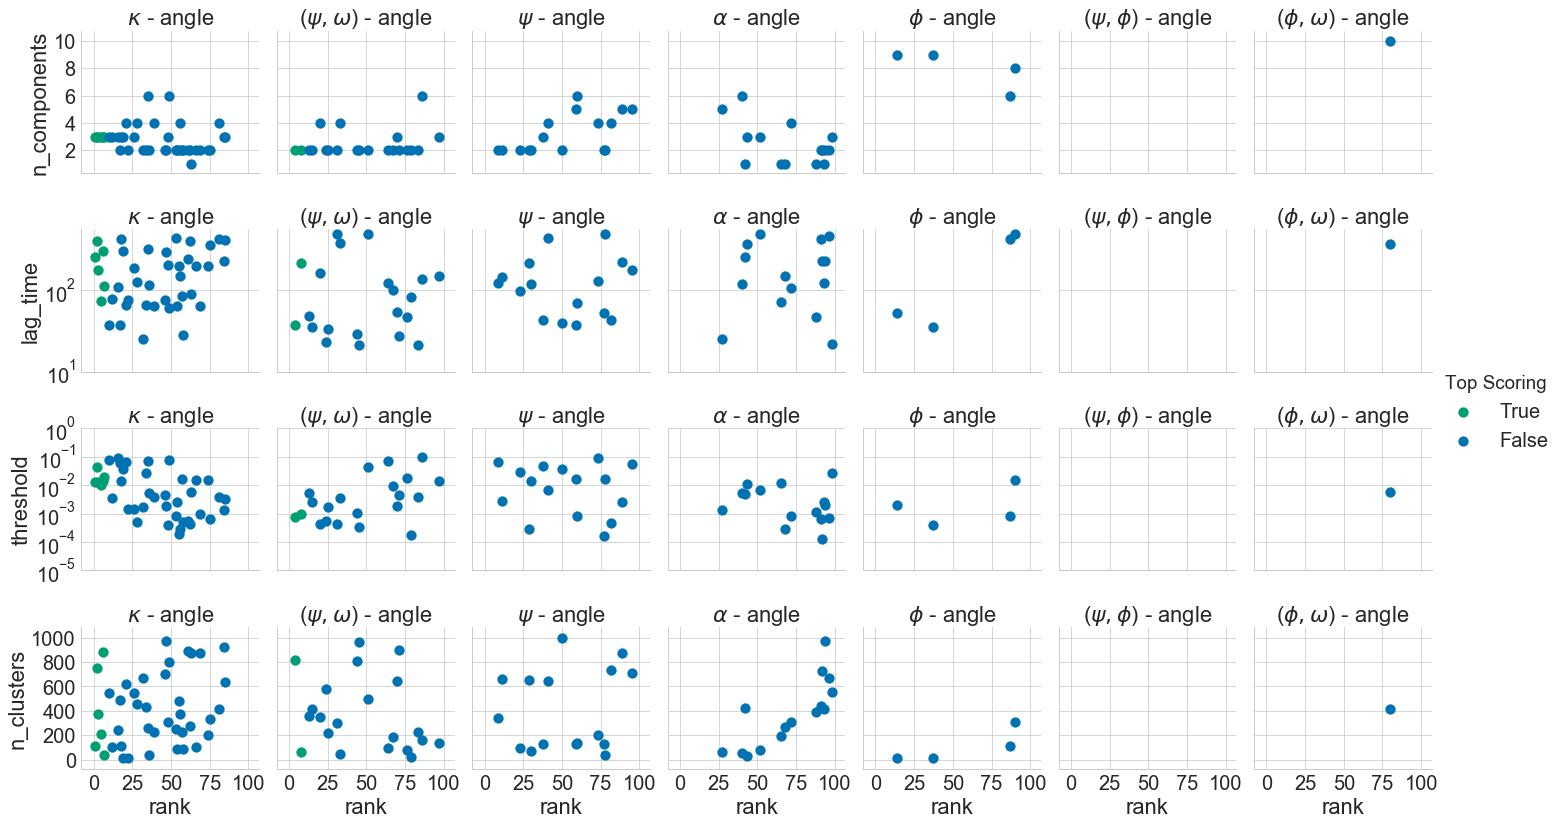

In [55]:
ts = 4

sample = df_melt.loc[(df_melt['n_timescales']==ts) & (df_melt['rank']<100), :]

feat_order= df['feature'].value_counts()
feat_order = list(feat_order.index)
var_order = sample['variable'].unique()
log_vars = ['threshold', 'lag_time']
log_lims  = {'threshold': (1e-5, 1e0), 
             'lag_time': (10, 550)}

with sns.plotting_context('paper', font_scale=2.5):
    g = sns.FacetGrid(col='feature',  hue='Top Scoring', row='variable',  sharey='row', data=sample, 
                      col_order=feat_order, row_order=var_order, hue_order=scoring_order, palette=scoring_cols)
    g.map(plt.scatter, 'rank', 'value', s=100)
    g.set_titles("{col_name} - angle")
    for i, ax in enumerate(g.axes.T.flatten()[:len(var_order)]):

        ax.set_ylabel(var_order[i])
        if(var_order[i] in log_vars):
            ax.set_yscale('log')
            ax.set_ylim(log_lims[var_order[i]])
    g.add_legend()
    g.fig.subplots_adjust(wspace=0.1)
    plt.savefig('figures/n_ts_{}_hyperparams.png'.format(ts))
    